Extração:

In [169]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

import requests
import pandas as pd

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [170]:
type(df)

pandas.core.frame.DataFrame

In [171]:
# Visualização inicial dos dados
print("Formato:", df.shape)
df.head()

Formato: (7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [172]:
# Verificação de tipos e dados ausentes
print("\nTipos de dados:\n", df.dtypes)
print("\nDados ausentes:\n", df.isnull().sum())


Tipos de dados:
 customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Dados ausentes:
 customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


Transformação:


In [173]:
#corrigir valores nulos
df.fillna(0, inplace=True)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [174]:
# Verificar valores nulos
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [175]:
# Verificar valores nulos
print(df['Churn'].value_counts(dropna=False))

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [177]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [178]:
# verificar valores duplicados
df_conversao = df.applymap(lambda x: str(x) if isinstance(x, dict) else x)
valores_duplicados = df_conversao.duplicated().sum()
print(f"Valores duplicados: {valores_duplicados}")


Valores duplicados: 0


/tmp/ipython-input-178-2535645213.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_conversao = df.applymap(lambda x: str(x) if isinstance(x, dict) else x)


In [179]:
# Verificar duplicadas na coluna
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        print(f"A coluna '{col}' contém dicionários.")


A coluna 'customer' contém dicionários.
A coluna 'phone' contém dicionários.
A coluna 'internet' contém dicionários.
A coluna 'account' contém dicionários.


Carga e Análise:

In [180]:
# Buscar clientes ativos
clientes_ativos = df[df['Churn'] == 'Yes']

# Exibir resultado
print("Clientes Ativos:")
print(clientes_ativos)

Clientes Ativos:
      customerID Churn                                           customer  \
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
18    0022-TCJCI   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
19    0023-HGHWL   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
...          ...   ...                                                ...   
7243  9961-JBNMK   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
7246  9965-YOKZB   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
7260  9985-MWVIX   Yes  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7261  9986-BONCE   Yes  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \

In [181]:
# Verificar total de clientes ativos
clientes_ativos = df[df['Churn'] == 'Yes']

total_ativos = clientes_ativos.shape[0]
print(f"Total de clientes ativos: {total_ativos}")


Total de clientes ativos: 1869


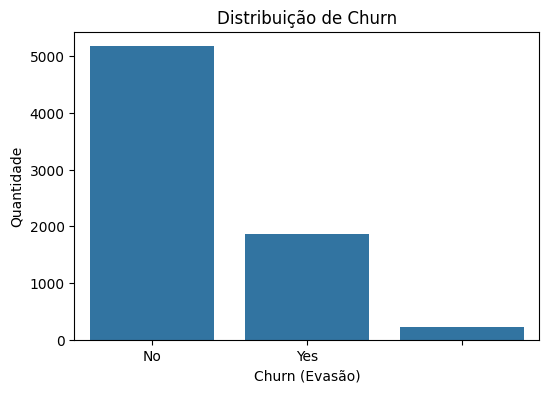

In [182]:
# Clientes que saíram vs. ficaram

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.xlabel('Churn (Evasão)')
plt.ylabel('Quantidade')
plt.show()


In [183]:
# Mostrar os nomes das colunas
print(df.columns)

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [184]:
# ler as primeiras linhas do data frame
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [185]:
# Verificar o tipo de contrato dentro da colunta Conta
print(df['account'].iloc[0])

{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}


In [186]:
df['TipoContrato'] = df['account'].apply(lambda x: x.get('Contract') if isinstance(x, dict) else None)


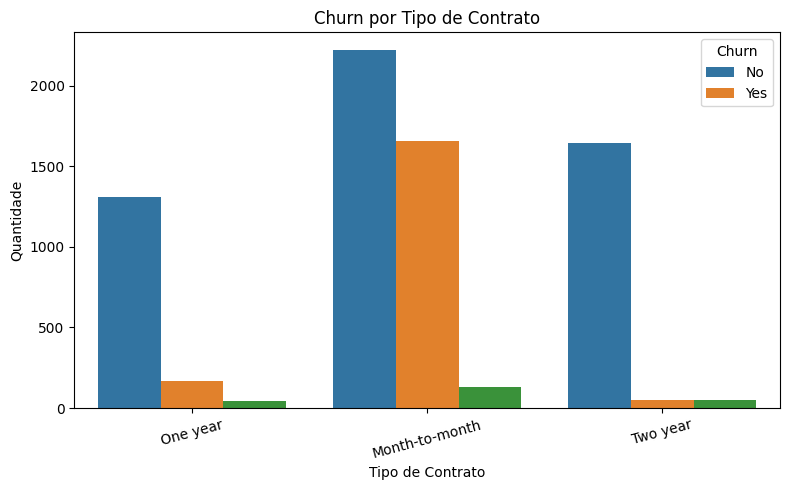

In [187]:
# Análise por tipo de contrato
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='TipoContrato', hue='Churn', data=df)
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [188]:
# Eliminando os valores nulos
print(df['Churn'].value_counts(dropna=False))

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


<Axes: xlabel='TipoContrato', ylabel='count'>

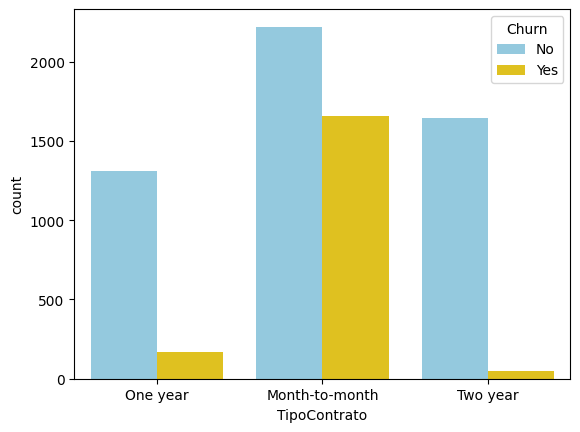

In [189]:
# Eliminando os valores nulos do gráfico
df_filtrado = df[df['Churn'].isin(['Yes', 'No'])]

sns.countplot(x='TipoContrato', hue='Churn', data=df_filtrado, palette={'No': 'skyblue', 'Yes': 'gold'})

In [190]:
df['TotalGasto'] = df['account'].apply(lambda x: x.get('Contract') if isinstance(x, dict) else None)

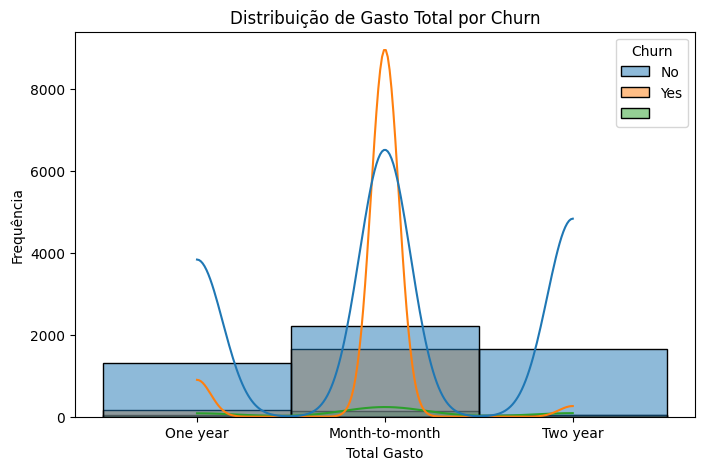

In [191]:
# Gráfico de TotalGasto

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='TotalGasto', hue='Churn', bins=30, kde=True)
plt.title('Distribuição de Gasto Total por Churn')
plt.xlabel('Total Gasto')
plt.ylabel('Frequência')
plt.show()


## Relatório

INSIGHTS:
- A maioria dos clientes que cancelam está em contratos mensais.
- Clientes com menor tempo de relacionamento e baixo gasto total tendem a sair mais.
- Programas de fidelidade podem ser eficazes para planos mensais.
- Monitorar clientes com baixo engajamento pode reduzir a evasão.
